In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")
from PIL import Image 

import matplotlib.pyplot as plt
%matplotlib inline

sns.set()

from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression,Lasso,Ridge,ElasticNet
from sklearn.metrics import mean_squared_error ,r2_score,adjusted_rand_score,mean_absolute_error
from sklearn.model_selection import train_test_split, KFold,cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestRegressor,GradientBoostingRegressor
from sklearn.tree import DecisionTreeRegressor

from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import (RandomForestRegressor, GradientBoostingRegressor, 
                              AdaBoostRegressor)
from sklearn.model_selection import GridSearchCV
import pickle

In [2]:
cemdf = pd.read_csv('concrete.csv')
cemdf.describe()

,cement,slag,ash,water,superplastic,coarseagg,fineagg,age,strength
count,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000
mean,281.167864,73.895825,54.188350,181.567282,6.204660,972.918932,773.580485,45.662136,35.817961
std,104.506364,86.279342,63.997004,21.354219,5.973841,77.753954,80.175980,63.169912,16.705742
min,102.000000,0.000000,0.000000,121.800000,0.000000,801.000000,594.000000,1.000000,2.330000
25%,192.375000,0.000000,0.000000,164.900000,0.000000,932.000000,730.950000,7.000000,23.710000
50%,272.900000,22.000000,0.000000,185.000000,6.400000,968.000000,779.500000,28.000000,34.445000
75%,350.000000,142.950000,118.300000,192.000000,10.200000,1029.400000,824.000000,56.000000,46.135000
max,540.000000,359.400000,200.100000,247.000000,32.200000,1145.000000,992.600000,365.000000,82.600000


In [3]:
cemdf.shape

(1030, 9)

In [4]:
cemdf.head(10)

,cement,slag,ash,water,superplastic,coarseagg,fineagg,age,strength
0,141.3,212.0,0.0,203.5,0.0,971.8,748.5,28,29.89
1,168.9,42.2,124.3,158.3,10.8,1080.8,796.2,14,23.51
2,250.0,0.0,95.7,187.4,5.5,956.9,861.2,28,29.22
3,266.0,114.0,0.0,228.0,0.0,932.0,670.0,28,45.85
4,154.8,183.4,0.0,193.3,9.1,1047.4,696.7,28,18.29
5,255.0,0.0,0.0,192.0,0.0,889.8,945.0,90,21.86
6,166.8,250.2,0.0,203.5,0.0,975.6,692.6,7,15.75
7,251.4,0.0,118.3,188.5,6.4,1028.4,757.7,56,36.64
8,296.0,0.0,0.0,192.0,0.0,1085.0,765.0,28,21.65
9,155.0,184.0,143.0,194.0,9.0,880.0,699.0,28,28.99


####  data types

In [5]:
cemdf.dtypes

cement          float64
slag            float64
ash             float64
water           float64
superplastic    float64
coarseagg       float64
fineagg         float64
age               int64
strength        float64
dtype: object

#### missing values.

In [6]:
cemdf.isnull().sum()

cement          0
slag            0
ash             0
water           0
superplastic    0
coarseagg       0
fineagg         0
age             0
strength        0
dtype: int64

### correlation


In [7]:
corr = cemdf.corr()
print(corr)

                cement      slag       ash     water  superplastic  coarseagg  \
cement        1.000000 -0.275216 -0.397467 -0.081587      0.092386  -0.109349   
slag         -0.275216  1.000000 -0.323580  0.107252      0.043270  -0.283999   
ash          -0.397467 -0.323580  1.000000 -0.256984      0.377503  -0.009961   
water        -0.081587  0.107252 -0.256984  1.000000     -0.657533  -0.182294   
superplastic  0.092386  0.043270  0.377503 -0.657533      1.000000  -0.265999   
coarseagg    -0.109349 -0.283999 -0.009961 -0.182294     -0.265999   1.000000   
fineagg      -0.222718 -0.281603  0.079108 -0.450661      0.222691  -0.178481   
age           0.081946 -0.044246 -0.154371  0.277618     -0.192700  -0.003016   
strength      0.497832  0.134829 -0.105755 -0.289633      0.366079  -0.164935   

               fineagg       age  strength  
cement       -0.222718  0.081946  0.497832  
slag         -0.281603 -0.044246  0.134829  
ash           0.079108 -0.154371 -0.105755  
water    

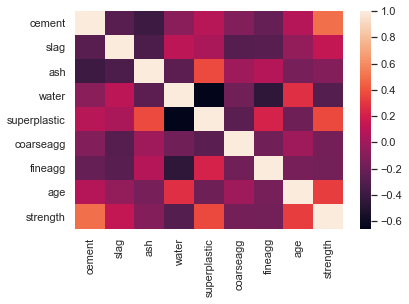

In [8]:
sns.heatmap(corr)

### bivariant

Text(0, 0.5, 'strength')

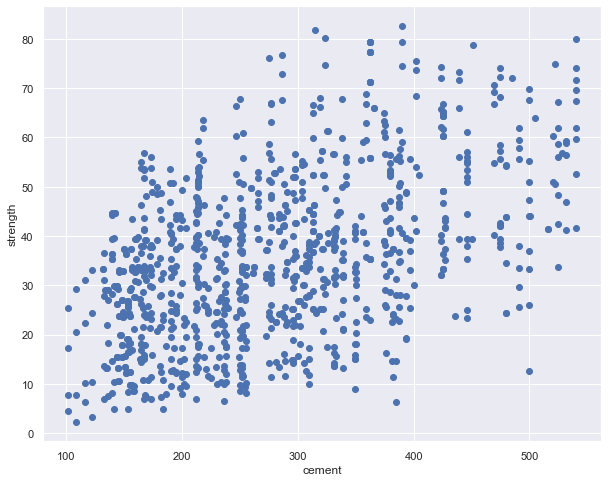

In [9]:
fig, ax = plt.subplots(figsize=(10, 8))

plt.scatter(cemdf['cement'], cemdf['strength'])

plt.xlabel('cement')
plt.ylabel('strength')

## More cement increased strength, poistive relation

Text(0, 0.5, 'strength')

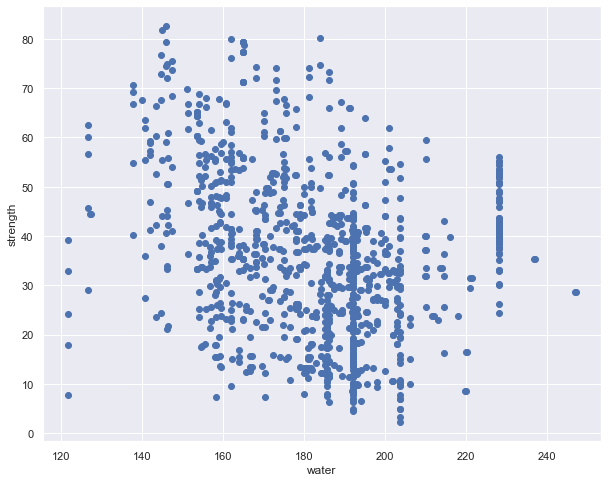

In [10]:
fig, ax = plt.subplots(figsize=(10, 8))

plt.scatter(cemdf['water'], cemdf['strength'])

plt.xlabel('water')
plt.ylabel('strength')

### More water decresed strength

Text(0, 0.5, 'strength')

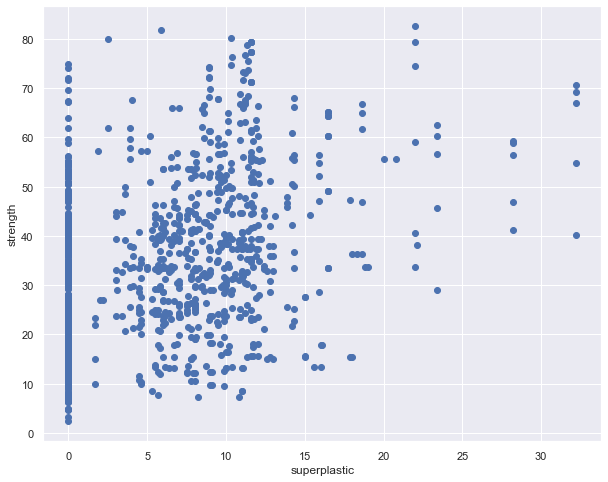

In [11]:
fig, ax = plt.subplots(figsize=(10, 8))

plt.scatter(cemdf['superplastic'], cemdf['strength'])

plt.xlabel('superplastic')
plt.ylabel('strength')

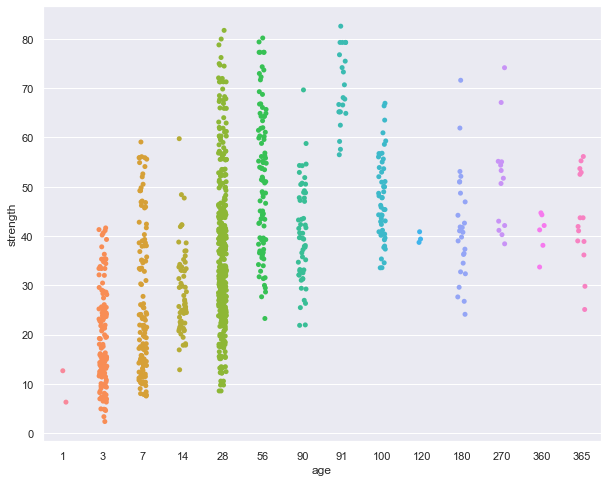

In [12]:
fig, ax = plt.subplots(figsize=(10, 8))

sns.stripplot(cemdf['age'], cemdf['strength'])

In [13]:
#### checking Yellow bricks for correlation

In [14]:
!pip install yellowbrick --upgrade

Requirement already up-to-date: yellowbrick in /opt/anaconda3/lib/python3.7/site-packages (1.1)


In [15]:
target = cemdf['strength']

features = cemdf[['age', 'water', 'cement', 'slag','ash']]
features.shape, target.shape

((1030, 5), (1030,))

In [16]:
from yellowbrick.target import FeatureCorrelation

feature_names = list(features.columns)

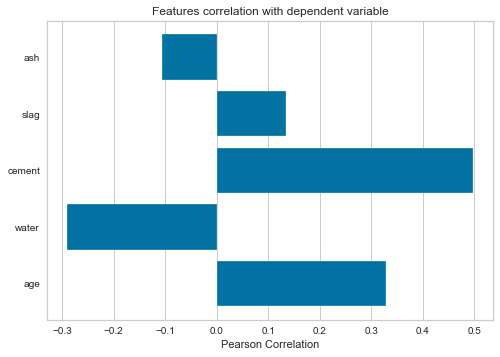

In [17]:
visualizer = FeatureCorrelation(labels = feature_names)

visualizer.fit(features, target)

visualizer.poof()

## After 360 days strength decressed

## Outliers

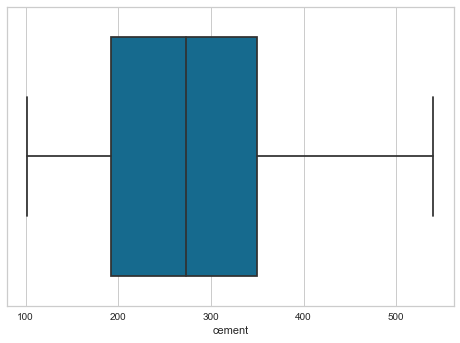

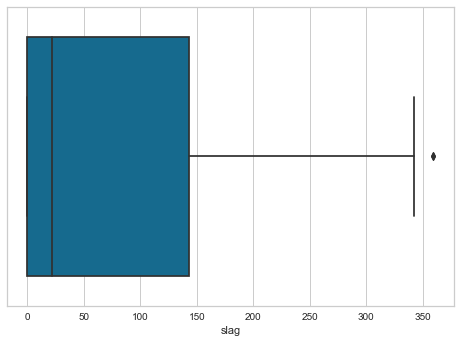

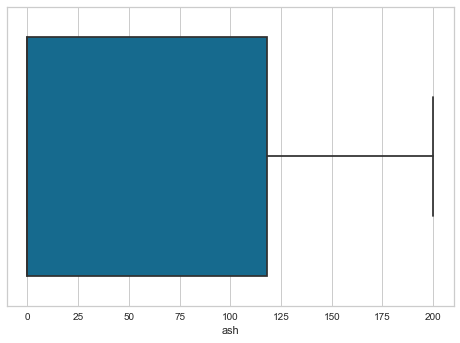

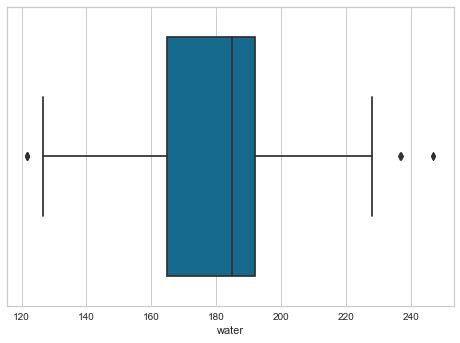

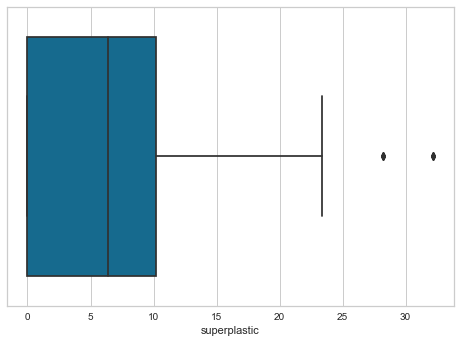

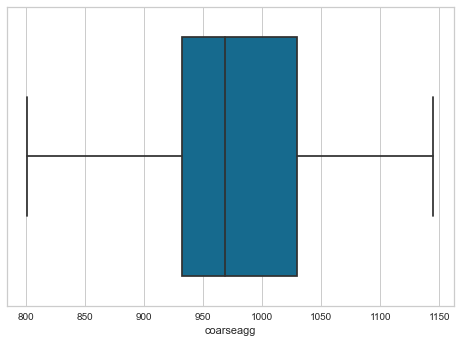

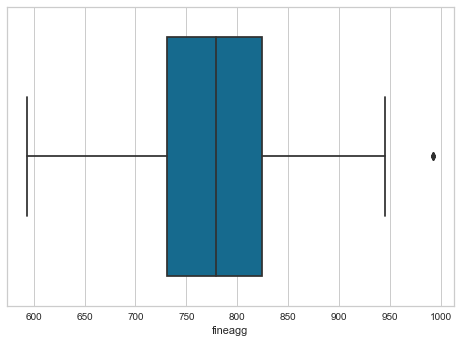

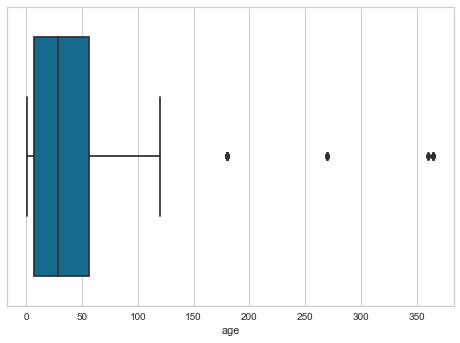

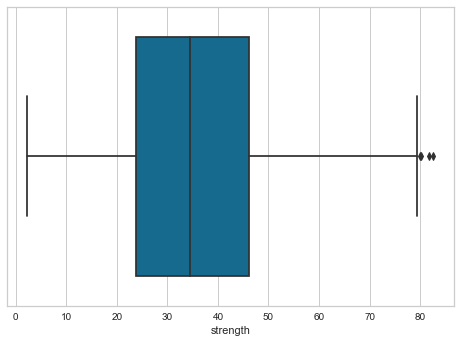

In [18]:
for column in cemdf:
    plt.figure()
    sns.boxplot(x=cemdf[column])

###  check for Age outliers


In [19]:
filter1 =cemdf['age'].values>125
df_outlier_age=cemdf[filter1]
df_outlier_age.shape

(59, 9)

#### Since the number of rows are less we are going to leave those 59 outliers

####  Apply  Standard Scalar to Normalize data

In [20]:
# Apply standard scalar
scale = StandardScaler()
# Fit your data on the scaler object
scaled_cemdf = scale.fit_transform(cemdf)
scaled_cemdf = pd.DataFrame(scaled_cemdf, columns=cemdf.columns)
scaled_cemdf.head()

,cement,slag,ash,water,superplastic,coarseagg,fineagg,age,strength
0,-1.339017,1.601441,-0.847144,1.027590,-1.039143,-0.014398,-0.312970,-0.279733,-0.355018
1,-1.074790,-0.367541,1.096078,-1.090116,0.769617,1.388141,0.282260,-0.501465,-0.737108
2,-0.298384,-0.856888,0.648965,0.273274,-0.118015,-0.206121,1.093371,-0.279733,-0.395144
3,-0.145209,0.465044,-0.847144,2.175461,-1.039143,-0.526517,-1.292542,-0.279733,0.600806
4,-1.209776,1.269798,-0.847144,0.549700,0.484905,0.958372,-0.959363,-0.279733,-1.049727


## Split

In [21]:
x_features=scaled_cemdf.drop(['strength'],axis=1)
y_features=scaled_cemdf['strength']

x_train,x_test,y_train,y_test = train_test_split(x_features,y_features,test_size=0.2,random_state=1)

print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(824, 8)
(206, 8)
(824,)
(206,)


## Now Apply different models

In [22]:
Model = []
R_SQURE = []
RMSE= []

cv = KFold(5, random_state = 1)

def input_scores(name, model, x, y):
    Model.append(name)
    RMSE.append(np.sqrt((-1) * cross_val_score(model, x, y, cv=cv, 
                                               scoring='neg_mean_squared_error').mean()))
    R_SQURE.append(cross_val_score(model, x, y, cv=cv, scoring='r2').mean())

In [23]:
#names = ['Linear Regression', 'Ridge Regression', 'Lasso Regression',
      #   'K Neighbors Regressor', 'Decision Tree Regressor', 
       #  'Random Forest Regressor', 'Gradient Boosting Regressor',
       #  'Adaboost Regressor']
names1 = ['Linear Regression', 'Ridge Regression', 'Lasso Regression',
         'K Neighbors Regressor', 'Decision Tree Regressor', 
          'Gradient Boosting Regressor'
         ]
models = [LinearRegression(), Ridge(), Lasso(),
          KNeighborsRegressor(), DecisionTreeRegressor(),
          RandomForestRegressor(), GradientBoostingRegressor(), 
          AdaBoostRegressor()]
for name, model in zip(names1, models):
    input_scores(name, model, x_train, y_train)
# get the data
model_results = pd.DataFrame({'Model': Model,
                           'RMSE': RMSE,
                           'R2': R_SQURE})
print("*****Results ")
model_results

*****Results 


,Model,RMSE,R2
0,Linear Regression,0.628006,0.599298
1,Ridge Regression,0.628072,0.599195
2,Lasso Regression,0.993427,-0.003958
3,K Neighbors Regressor,0.552880,0.688894
4,Decision Tree Regressor,0.429156,0.823549
5,Gradient Boosting Regressor,0.311272,0.900199


#### Tunning Gradient Boosting

In [24]:
GradientBoostingRegressor()

GradientBoostingRegressor(alpha=0.9, ccp_alpha=0.0, criterion='friedman_mse',
                          init=None, learning_rate=0.1, loss='ls', max_depth=3,
                          max_features=None, max_leaf_nodes=None,
                          min_impurity_decrease=0.0, min_impurity_split=None,
                          min_samples_leaf=1, min_samples_split=2,
                          min_weight_fraction_leaf=0.0, n_estimators=100,
                          n_iter_no_change=None, presort='deprecated',
                          random_state=None, subsample=1.0, tol=0.0001,
                          validation_fraction=0.1, verbose=0, warm_start=False)

In [25]:
# tunning number of trees
param_grid = {'n_estimators':range(20,1001,10),
              'max_depth':[10], #range(5,16,2), 
              'min_samples_split':[100], #range(200,1001,200), 
              'learning_rate':[0.2]}
clf = GridSearchCV(GradientBoostingRegressor(random_state=1), 
                   param_grid = param_grid, scoring='r2', 
                   cv=cv).fit(x_train, y_train)
print(clf.best_estimator_) 
print("R Squared:",clf.best_score_)

GradientBoostingRegressor(alpha=0.9, ccp_alpha=0.0, criterion='friedman_mse',
                          init=None, learning_rate=0.2, loss='ls', max_depth=10,
                          max_features=None, max_leaf_nodes=None,
                          min_impurity_decrease=0.0, min_impurity_split=None,
                          min_samples_leaf=1, min_samples_split=100,
                          min_weight_fraction_leaf=0.0, n_estimators=210,
                          n_iter_no_change=None, presort='deprecated',
                          random_state=1, subsample=1.0, tol=0.0001,
                          validation_fraction=0.1, verbose=0, warm_start=False)
R Squared: 0.9283734151926433


In [26]:
# tree parameter tunning
param_grid = {'n_estimators': [230],
              'max_depth': range(10,31,2), 
              'min_samples_split': range(50,501,10), 
              'learning_rate':[0.2]}
clf = GridSearchCV(GradientBoostingRegressor(random_state=1), 
                   param_grid = param_grid, scoring='r2', 
                   cv=cv).fit(x_train, y_train)
print(clf.best_estimator_) 
print("R Squared:",clf.best_score_)

GradientBoostingRegressor(alpha=0.9, ccp_alpha=0.0, criterion='friedman_mse',
                          init=None, learning_rate=0.2, loss='ls', max_depth=18,
                          max_features=None, max_leaf_nodes=None,
                          min_impurity_decrease=0.0, min_impurity_split=None,
                          min_samples_leaf=1, min_samples_split=190,
                          min_weight_fraction_leaf=0.0, n_estimators=230,
                          n_iter_no_change=None, presort='deprecated',
                          random_state=1, subsample=1.0, tol=0.0001,
                          validation_fraction=0.1, verbose=0, warm_start=False)
R Squared: 0.9340229025907385


### increasing estimators and decreasing learning rate

In [27]:
clf = GradientBoostingRegressor(random_state=1, max_depth=18, 
                                min_samples_split=190, n_estimators=230*2, 
                                learning_rate=0.2/2)
print("R Squared:",cross_val_score(clf, x_train, y_train, cv=cv, scoring='r2').mean())

R Squared: 0.9338629916534249


##  Best mode is is GradientBoostingRegressor with max_depth=18, min_sample_split=190, n_estimator=230, learning rate 0.2

In [ ]:
### Best mode is is GradientBoostingRegressor with max_depth=18, min_sample_split=190, n_estimator=230, learning rate 0.2

In [34]:
clf = GradientBoostingRegressor(learning_rate=0.2, max_depth=18,
                                min_samples_split=190, n_estimators=230, 
                                random_state=1).fit(x_train, y_train)
print("RMSE: ", np.sqrt(mean_squared_error(y_test, clf.predict(x_test))))
print("R^2: ", r2_score(y_test, clf.predict(x_test)))


RMSE:  0.22684690851480474
R^2:  0.9512768325310867
